Optimistic initial values theory is a concept commonly used in the context of solving the multi-armed bandit problem, which is a classic problem in reinforcement learning and decision-making. The theory suggests that you can improve the exploration and exploitation trade-off by initializing the estimated values of the bandit arms optimistically, with values that are higher than their true expected rewards.

Here's an explanation of optimistic initial values theory and how it works:

Problem Background:

In the multi-armed bandit problem, you are faced with a set of bandit arms, each associated with an unknown probability distribution for generating rewards.
Your goal is to maximize the total cumulative reward over a series of trials (or pulls) by selecting the bandit arms in a way that balances exploration (trying different arms to learn their rewards) and exploitation (selecting the arm with the highest expected reward).
Optimistic Initial Values:

Optimistic initial values theory suggests that when you start the bandit problem, you should initialize the estimated values (or expected rewards) of all bandit arms with optimistic values that are higher than their true expected rewards.
By doing this, you encourage exploration in the early stages of the problem because the optimistic initial estimates make the arms appear more rewarding than they actually are.
Exploration vs. Exploitation:

When the estimated values of all arms are initialized optimistically, the algorithm is encouraged to explore each arm initially because they all seem promising.
As the algorithm collects more data and updates the estimated values based on observed rewards, it gradually converges toward more accurate estimates.
Over time, the algorithm will naturally shift from exploration (trying different arms) to exploitation (selecting the arm with the highest estimated value) as it becomes more confident about the true values of the arms.
Benefits of Optimistic Initial Values:

Optimistic initial values theory has the advantage of promoting early exploration, which can be particularly useful when you have limited information about the bandit arms.
It ensures that all arms are given a fair chance to be explored and evaluated, potentially leading to the discovery of the best arm more quickly.
As the algorithm learns and converges to accurate estimates, it transitions to exploitation, which maximizes the long-term reward.
Caution and Setting Initial Values:

While optimistic initial values theory can be effective, it's essential to choose the initial values carefully. They should be optimistic enough to encourage exploration but not so high that they become unrealistic.
The choice of the initial values can impact the algorithm's performance, and it often depends on the specific problem and the available information.
In summary, optimistic initial values theory is a strategy used in solving the multi-armed bandit problem to balance exploration and exploitation by starting with optimistic estimates for the bandit arms' expected rewards. This approach helps in early exploration and learning about the arms' true values, ultimately leading to better long-term rewards.

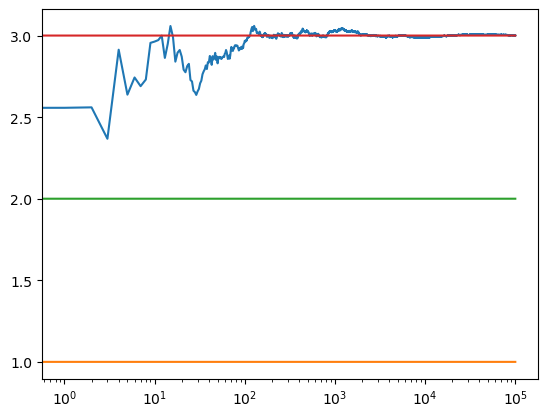

2.939313648106765
2.9721891815753123
3.00079246371411


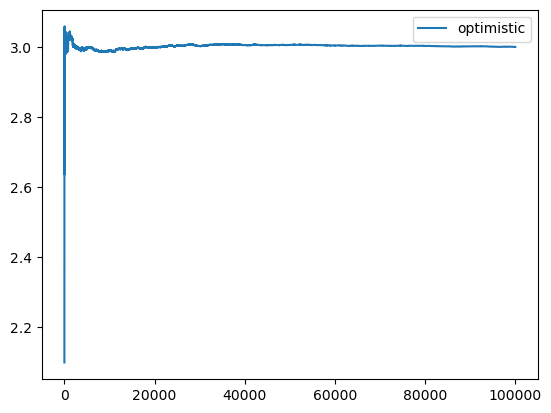

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def pull_bandit(m):
    return np.random.randn() + m

def update_estimate(m_estimate, N, x):
    N += 1
    m_estimate = (1 - 1.0 / N) * m_estimate + 1.0 / N * x
    return m_estimate, N

def run_experiment(m1, m2, m3, N, upper_limit=10):
    m_estimates = [upper_limit, upper_limit, upper_limit]
    bandit_counts = [1, 1, 1]

    data = np.empty(N)
    
    for i in range(N):
        # optimistic initial values
        j = np.argmax(m_estimates)
        x = pull_bandit([m1, m2, m3][j])
        m_estimates[j], bandit_counts[j] = update_estimate(m_estimates[j], bandit_counts[j], x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()

    for m_estimate in m_estimates:
        print(m_estimate)

    return cumulative_average

if __name__ == '__main__':
    oiv = run_experiment(1.0, 2.0, 3.0, 100000)

    # linear plot
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.show()
